![title](./cover.png)

# Misión
En esta práctica tendrás que corregir los datos sintéticos calculando el **Normal Moveout**. Además, calcularás las funciones receptoras para una estación en Canada, utilizando el sismo de M7.1 occurido el **19 de septiembre del 2017**. 
# Paquetería adicional
Antes de empeza, instala la siguiente paquetería para el cálculo de las **funciones receptoras**. Desde la línea de comando escribe el sigueinte comando. 
```Python
pip install rf
```
A continuación carga las siguientes librerias. 

In [1]:
%matplotlib inline
import numpy as np                         
from scipy.interpolate import CubicSpline  
import matplotlib.pyplot as plt            

# Datos sintéticos CMP
Carga los datos sintéticos que contienen los formas de onda (**data.dat**) y los offsets (**offset.dat**). Utiliza el comando **np.loadtxt()**.

In [2]:
# Escribe tu código aquí ~2 líneas
cmp     = np.loadtxt(None)
offsets = np.loadtxt(None)
dt      = 4e-3

In [24]:
nsamples = cmp.shape[0]
noffsets = cmp.shape[1]
print('dt = {} s'.format(dt))
print('offsets =', offsets)
print('N samples = {}'.format(nsamples))
print('N offsets = {}'.format(noffsets))

dt = 0.004 s
offsets = [-540. -525. -510. -495. -480. -465. -450. -435. -420. -405. -390. -375.
 -360. -345. -330. -315. -300. -285. -270. -255. -240. -225. -210. -195.
 -180. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.
    0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.
  180.  195.  210.  225.  240.  255.  270.  285.  300.  315.  330.  345.
  360.  375.  390.  405.  420.  435.  450.  465.  480.  495.  510.  525.
  540.]
N samples = 501
N offsets = 73


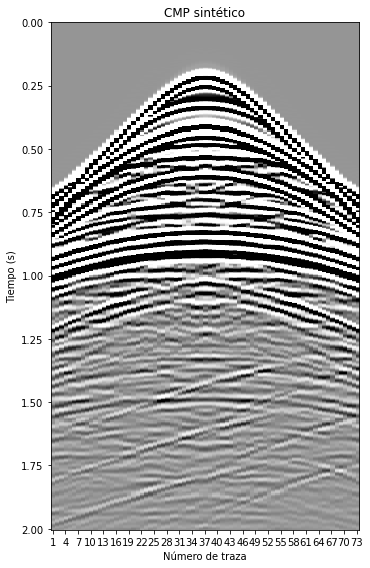

In [4]:
fig  = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
ax.set_title('CMP sintético')
ax.set_xlabel('Número de traza')
ax.set_ylabel('Tiempo (s)')
cutoff = 0.1
t_vec  = np.linspace(0,dt*(nsamples-1),nsamples)
ax.imshow(cmp, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=60, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1,3))
ax.set_xticks(trace_numbers)

#ax2 = plt.subplot(122)
#for k in range(noffsets):
#    ax2.plot( cmp[:,k]/np.max(np.abs(cmp[:,k])) + k, t_vec,'k')
#ax2.set_xlabel('Número de traza')
#ax2.set_ylabel('Tiempo (s)')
#ax2.invert_yaxis()
fig.tight_layout()

# Corrección NMO
La corrección por **moveout** se puede contruir de la siguiente forma.
1. Crea una matriz con las mismas dimesiones de la matriz de datos llena de ceros. (**Tip**. Utiliza la función de **np.zeros_like()**.)
2. Para cada punto *(x,$t_0$)* haz lo siguiente:
 - Calcula el tiempo de reflexión *(t)* para una velocidad dada *$v_{NMO}$*.
 - Para la traza con **offset** *x* en el CMP, encuentra dos muestras antes y dos muestras después del tiempo *t*.
 - Usa la amplitud de estas cuatro muestras para interpolar la amplitud en el tiempo *t*.
 - Copia el valor interpolado a la matriz *NMO* en la posición (*$t_0$,x*).

Vamos a implementar este algoritmo a través de las siguintes funciones:
- reflection_time(t_0, x, vnmo)
- sample_trace(trace, time, dt)
- nmo_correction(cmp, dt, offsets, velocities)

In [5]:
def nmo_correction(cmp, dt, offsets, velocities):
    """
    Calcula la corrección de  NMO para un CMP dado.
    
    Las unidades debe de ser consistentes. Si dt está en segundos
    y los offset en metros. Entonces, la velocidad debe de ser m/s.
    
    Parametros
    ----------
    
    cmp : 2D array
        El CMP gather que quieres corregir.
    dt : float
        Intervalo de muestro.
    offsets : 1D array
        Un arreglo con la localización de cada una de las trazas.
    Velocidades : 1D array
        Un arreglo con la velocidad NMO para cada instante de tiempo. 
        Tiene el mismo número de elementos que muestras en CMP.

        
    Returns
    -------
    
    nmo : 2D array
        Corrección por moveout.
        
    """
    nmo = np.zeros_like(cmp)
    nsamples = cmp.shape[0]
    times = np.arange(0, nsamples*dt, dt)
    for i, t0 in enumerate(times):
        for j, x in enumerate(offsets):
            t = reflection_time(t0, x, velocities[i])
            amplitude = sample_trace(cmp[:, j], t, dt)
            # Si el rango del tiempo t cae fuera del rango de CMP
            # la amplitud será None. 
            if amplitude is not None:
                nmo[i, j] = amplitude
    return nmo 

Calcula el tiempo de reflexión de la siguiente manera:
$$
\begin{equation}
t=\sqrt{t^2_0+\frac{x^2}{v^{2}_{NMO}}}
\end{equation}
$$

In [34]:
def reflection_time(t0, x, vnmo):
    """
    Calcula el tiempo de viaje de la onda reflejada.
    
    No considera refracciones ni cambios de velocidad.
        
    Las unidades debe de ser consistentes. Si dt está en segundos
    y los offset en metros. Entonces, la velocidad debe de ser m/s.
    
    Parametros
    ----------
    
    t0 : float
        t0 tiempo de la incidencia normal.
    x : float
        Offset del receptor.
    vnmo : float
        Velocidad NMO
        
    Returns
    -------
    
    t : float
        El tiempo de viaje de la reflexión.
        
    """
    # Escribe tu código aquí ~1 líneas
    t = None
    return t

La siguiente línea verifica que la implementación ed la función anterior sea carrecta.

In [36]:
assert reflection_time(t0=4, x=9000, vnmo=3000) == 5, "Failed test."

Si no pasa nada, significa que la implementación es correcta. 
A continuación intenta modificar la velocidad $v_{NMO}$, de forma que se ajuste una parábola (línea roja) al primer arribo. 

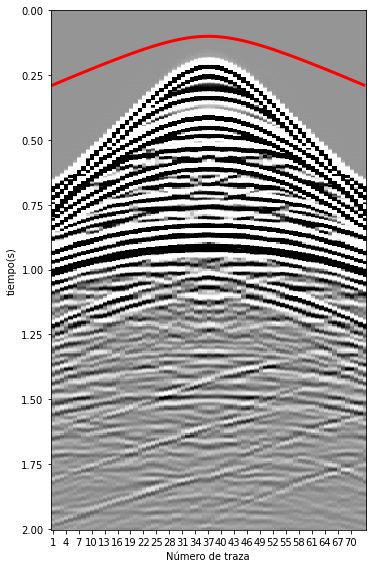

In [54]:
# Escribe tu código aquí ~1 líneas
reflect_times = reflection_time(t0=None, x=offsets, vnmo=None)

fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(111)
ax.set_xlabel('Número de traza')
ax.set_ylabel('tiempo(s)')
cutoff = 0.1
ax.imshow(cmp, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=60, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1))
plt.plot(trace_numbers, reflect_times, '-r', linewidth=3)
ax.set_xticks(trace_numbers[0:-1:3])
ax.set_ylim(nsamples*dt, 0)
ax.set_xlim(0.5, noffsets + 0.5)
fig.tight_layout()

La siguiente función hace la interpolación de la amplitud en base a los valores de CMP. 

In [9]:
def sample_trace(trace, time, dt):
    """
    Muestrea la amplitud a un tiempo dada mediante la interpolació de los datos.
    
    Parameteros
    ----------
    
    trace : 1D array
        Contiene las amplitudes de una sola traza. 
    time : float
        El tiempo al cual quiero muestrar la amplitud. 
    dt : float
        El intervalo de muetreo. 
        
    Returns
    -------
    
    amplitude : float or None
        La interporlación de la amplitud. Es None, si el 
        tiempo es mayor a la duración de la traza, o si hay
        menos de dos puntos para interpolar.

        
    """
    # La función floor nos da el entero más cercano hacia 
    # abajo de un número real. 
    # Uilizalo para encontrar el indice que está justo antes
    # del tiempo que estas buscando.

    before = int(np.floor(time/dt))
    N = trace.size
    # Usa 4 muestras para interpolar. 
    samples = np.arange(before - 1, before + 3)
    if any(samples < 0) or any(samples >= N):
        amplitude = None
    else:
        times        = dt*samples
        amps         = trace[samples]
        interpolator = CubicSpline(times, amps)
        amplitude   = interpolator(time)
    return amplitude

A continuación, vamos a verificar que el procedimeinto es correcto.

In [56]:
trace = cmp[:, 0]
for sample in range(2, trace.size - 2):
    interpolated = sample_trace(trace, sample*dt, dt)
    assert np.allclose(trace[sample], interpolated)

In [57]:
for sample in [0, trace.size - 2, trace.size - 1]:
    assert sample_trace(trace, sample*dt + 1e-5, dt) is None

# Corrección por NMO 
A continuación vamos a aplicar las funciones que realizaste anteriormente a los datos de **CMP** para obtener la corrección por **NMO**.
Primero vamos a suponer un perfíl de velocidades lineal que en base a dos puntos. 

In [74]:
times = np.arange(nsamples)*dt
v1, t1 = 900, 0.3
v2, t2 = 1800, 1.1
# equation for a straight line between two points.
v_nmo = v1 + ((v2 - v1)/(t2 - t1))*(times - t1)

Finalmente, obtenemos la corrección por **NMO** en una sola línea. 

In [75]:
nmo = nmo_correction(cmp, dt, offsets, v_nmo)

Por último vamos a graficar los resultados. 

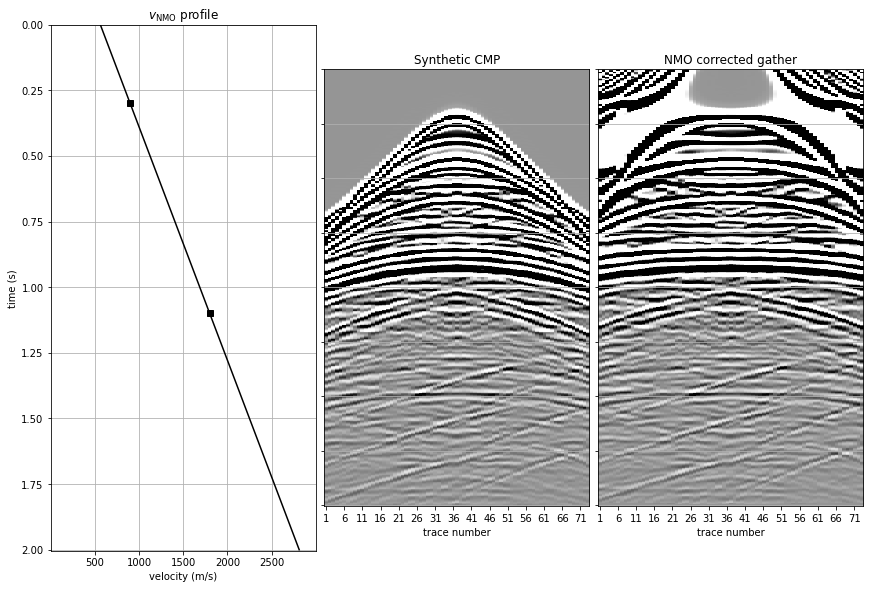

In [76]:
fig = plt.figure(figsize=(12, 8.1))

ax = plt.subplot(131)
ax.set_title(r'$v_\mathrm{NMO}$ profile')
ax.plot(v_nmo, np.arange(nsamples)*dt, '-k')
ax.plot([v1, v2], [t1, t2], 'sk')
ax.set_xlabel('velocity (m/s)')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 3000)
ax.set_ylim(nsamples*dt, 0)
ax.grid()
ax.set_xticks(ax.get_xticks()[1:-1])

ax = plt.subplot(132)
ax.set_title('Synthetic CMP')
ax.set_xlabel('trace number')
cutoff = 0.1
aspect = 60
ax.imshow(cmp, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=aspect, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1,5))
ax.set_xticks(trace_numbers)
ax.set_yticklabels([])
ax.grid(axis='y')

ax = plt.subplot(133)
ax.set_title('NMO corrected gather')
ax.set_xlabel('trace number')
ax.imshow(nmo, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=aspect, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1,5))
ax.set_xticks(trace_numbers)
ax.set_yticklabels([])
ax.grid(axis='y')

plt.tight_layout(pad=0.4, w_pad=0.5)

# Funciones receptoras
Para el cálculo de las fuciones receptoras hay que segir el siguiente procedimiento utilizando la base de datos de **Wilbert** para descargar tus datos: 
1. Elige una estación que este disponible en **IRIS**. 
2. Busca sismos registrados por esta estación entre **30-40 grados** de distancia con una magnitud mayor a **M>6.0**. Preferentemente busca sismos que hayan ocurridos cercanos entre sí con magnitudes similares. 
3. Realiza el procedimiento que se describe a continuación. 

In [77]:
import matplotlib.pyplot as plt
from rf import read_rf, rfstats

Carga tus datos y visualizalos. 

In [ ]:
# Escribe tu código aquí ~1 línea
stream = read_rf(None)
print(stream)
stream.plot();

## Posible solución.
(Tus gráficas pueden variar)
![title](./rf1.png)

Utiliza, **taup** (esta librería la usastes en prácticas anteriores) para calcular el tiempo de arribo teórico de la onda **P**. Recorta tus sismgromas para 5 segundos antes y 40 segundos después de la llegada de la onda **P**.
**Nota**. Puedes hacer este cálculo por separado y simplemente incluir el valor obtenido. 

In [ ]:
rfstats(stream)
stream.filter('bandpass', freqmin=0.2, freqmax=1)
# Escribe tu código aquí ~1 líneas
stream.trim2(None, None, 'starttime')
print(stream)
stream.plot(type='relative', reftime=stream[0].stats.onset);

## Posible solución.
(Tus gráficas pueden variar)
![title](./rf2.png)

In [ ]:
stream.rf()
stream.moveout()
stream.trim2(-5, 22, 'onset')
print(stream)
stream.select(component='L').plot_rf()    
stream.select(component='Q').plot_rf()
plt.show()

## Posible solución.
(Tus gráficas pueden variar)
![title](./rf3.png)
![title](./rf4.png)